In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# pd.set_option("precision", 2)
# pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0SL1EN/marketing_campaign.csv', sep=";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [6]:
u = list(df['Marital_Status'].unique())
u.sort()
print(u)

['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO']


In [7]:
df[['Education','Marital_Status']] = df[['Education','Marital_Status']].astype('category')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df[['Education','Marital_Status', 'Dt_Customer']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Education       2240 non-null   category      
 1   Marital_Status  2240 non-null   category      
 2   Dt_Customer     2240 non-null   datetime64[ns]
dtypes: category(2), datetime64[ns](1)
memory usage: 22.6 KB


In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [9]:
df.describe(include='category')

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


In [10]:
pd.options.display.float_format = '{:.1f}%'.format
ed = df['Education'].value_counts(normalize=True)*100
ed

Education
Graduation   50.3%
PhD          21.7%
Master       16.5%
2n Cycle      9.1%
Basic         2.4%
Name: proportion, dtype: float64

In [11]:
pd.crosstab(df['Education'],
            df['Marital_Status'], normalize=True
            )*100

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,0.0%,0.0%,1.0%,3.6%,1.7%,2.5%,0.2%,0.0%
Basic,0.0%,0.0%,0.0%,0.9%,0.8%,0.6%,0.0%,0.0%
Graduation,0.0%,0.0%,5.3%,19.3%,11.2%,12.8%,1.6%,0.0%
Master,0.0%,0.0%,1.7%,6.2%,3.3%,4.7%,0.5%,0.0%
PhD,0.0%,0.0%,2.3%,8.6%,4.4%,5.2%,1.1%,0.1%


<Axes: xlabel='Marital_Status', ylabel='Education'>

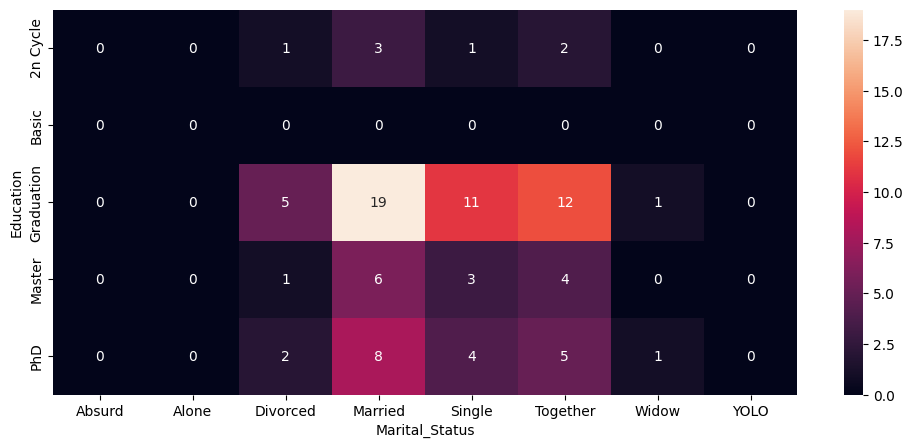

In [12]:
plt.figure(figsize=(12,5))
sns.heatmap((pd.crosstab(df['Education'],
            df['Marital_Status'], normalize=True
            )*100).astype('int'), annot=True, fmt="d")

In [13]:
pd.crosstab(df['Education'],
            df['AcceptedCmp1'], normalize=True, margins=True, margins_name="Total"
            )*100

AcceptedCmp1,0,1,Total
Education,,,
2n Cycle,8.4%,0.6%,9.1%
Basic,2.4%,0.0%,2.4%
Graduation,46.7%,3.7%,50.3%
Master,15.7%,0.8%,16.5%
PhD,20.4%,1.3%,21.7%
Total,93.6%,6.4%,100.0%


In [14]:
pd.crosstab(df['Marital_Status'],
            df['AcceptedCmp1'], normalize=True, margins=True, margins_name="Total"
            )*100

AcceptedCmp1,0,1,Total
Marital_Status,,,
Absurd,0.0%,0.0%,0.1%
Alone,0.1%,0.0%,0.1%
Divorced,9.8%,0.5%,10.4%
Married,35.8%,2.8%,38.6%
Single,20.0%,1.4%,21.4%
Together,24.5%,1.4%,25.9%
Widow,3.2%,0.2%,3.4%
YOLO,0.1%,0.0%,0.1%
Total,93.6%,6.4%,100.0%


In [15]:
pd.options.display.float_format = '{:.2f}'.format
df.pivot_table(index= "Education", columns = 'Marital_Status', values = 'AcceptedCmp1', aggfunc = "sum")

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,0,0,1,8,3,1,1,0
Basic,0,0,0,0,0,0,0,0
Graduation,1,0,9,33,13,24,2,0
Master,0,0,1,9,4,2,2,0
PhD,0,0,1,13,11,5,0,0


In [16]:
dfa1 = df[df['AcceptedCmp1']>0]
dfa1['AcceptedCmp'] = 1
dfa1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AcceptedCmp
15,2114,1946,PhD,Single,82800.00,0,0,2012-11-24,23,1006,...,0,0,1,1,0,0,3,11,1,1
18,6565,1949,Master,Married,76995.00,0,1,2013-03-28,91,1012,...,0,0,0,1,0,0,3,11,0,1
53,2225,1977,Graduation,Divorced,82582.00,0,0,2014-06-07,54,510,...,1,0,0,1,0,0,3,11,1,1
67,9369,1979,2n Cycle,Single,88194.00,0,1,2014-03-19,19,688,...,1,0,0,1,0,0,3,11,1,1
87,4452,1957,Graduation,Single,50388.00,0,1,2014-05-28,3,292,...,0,1,0,1,0,0,3,11,1,1


In [17]:
dfa2 = df[df['AcceptedCmp2']>0]
dfa2['AcceptedCmp'] = 2
dfa2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AcceptedCmp
252,10089,1974,Graduation,Divorced,102692.00,0,0,2013-04-05,5,168,...,0,1,1,1,1,0,3,11,1,2
295,2926,1952,Master,Together,55951.00,0,1,2012-08-23,62,1241,...,0,1,0,0,1,0,3,11,0,2
342,9707,1969,PhD,Married,55212.00,0,1,2012-11-23,65,1103,...,0,1,0,0,1,0,3,11,0,2
417,5067,1994,Graduation,Together,80134.00,0,0,2014-02-14,11,966,...,0,1,1,1,1,0,3,11,0,2
430,3725,1961,PhD,Single,84865.00,0,0,2013-05-09,1,1248,...,0,1,1,1,1,0,3,11,1,2


In [18]:
dfa = pd.concat([dfa1, dfa2], ignore_index=True)

print(dfa.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  2114        1946         PhD         Single 82800.00        0         0   
1  6565        1949      Master        Married 76995.00        0         1   
2  2225        1977  Graduation       Divorced 82582.00        0         0   
3  9369        1979    2n Cycle         Single 88194.00        0         1   
4  4452        1957  Graduation         Single 50388.00        0         1   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-11-24       23      1006  ...             0             0   
1  2013-03-28       91      1012  ...             0             0   
2  2014-06-07       54       510  ...             1             0   
3  2014-03-19       19       688  ...             1             0   
4  2014-05-28        3       292  ...             0             1   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             1             1             0 

In [19]:
df_p = pd.pivot_table(dfa, values='ID', index=['AcceptedCmp','Education'],
               columns=['Marital_Status'], aggfunc="count", fill_value=0, margins=True, margins_name="Total")
df_p

Marital_Status          Absurd  Alone  Divorced  Married  Single  Together  \
AcceptedCmp Education                                                        
1           2n Cycle         0      0         1        8       3         1   
            Basic            0      0         0        0       0         0   
            Graduation       1      0         9       33      13        24   
            Master           0      0         1        9       4         2   
            PhD              0      0         1       13      11         5   
2           2n Cycle         0      0         2        0       0         0   
            Basic            0      0         0        0       0         0   
            Graduation       0      0         2        4       3         7   
            Master           0      0         0        0       1         1   
            PhD              0      0         1        3       1         4   
Total                        1      0        17       70      36        44   

Marital_Status          Widow  YOLO  Total  
AcceptedCmp Education                       
1           2n Cycle        1     0  14.00  
            Basic           0     0    NaN  
            Graduation      2     0  82.00  
            Master          2     0  18.00  
            PhD             0     0  30.00  
2           2n Cycle        0     0   2.00  
            Basic           0     0    NaN  
            Graduation      0     0  16.00  
            Master          0     0   2.00  
            PhD             1     0  10.00  
Total                       6     0 174.00

In [20]:
dfa['AcceptedCmp'].value_counts(normalize=True).sort_index()

AcceptedCmp
1   0.83
2   0.17
Name: proportion, dtype: float64

In [21]:
d = df_p.reset_index()
d = d[d.columns[:-1]]
d = d.set_index('Education')
d

Marital_Status,AcceptedCmp,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,,
2n Cycle,1,0,0,1,8,3,1,1,0
Basic,1,0,0,0,0,0,0,0,0
Graduation,1,1,0,9,33,13,24,2,0
Master,1,0,0,1,9,4,2,2,0
PhD,1,0,0,1,13,11,5,0,0
2n Cycle,2,0,0,2,0,0,0,0,0
Basic,2,0,0,0,0,0,0,0,0
Graduation,2,0,0,2,4,3,7,0,0
Master,2,0,0,0,0,1,1,0,0


In [22]:
# Initialize df with the 'AcceptedCmp' column (you might have different initial data)
df = pd.DataFrame({'AcceptedCmp': [0, 1, 0, 2]})

rows_to_append = []
for a in range(2, 6):
    new_row_data = {
        'AcceptedCmp': a - (df['AcceptedCmp'] == 1).sum()
    }
    rows_to_append.append(pd.Series(new_row_data))

df_dif = pd.concat([df] + rows_to_append, ignore_index=True)
print(df_dif)
for a in range(2, 6):
    new_row_data = {
        'AcceptedCmp': a - (df['AcceptedCmp'] == 1).sum()
    }
    rows_to_append.append(pd.Series(new_row_data))

# Concatenate the list of Series to the DataFrame
df_dif = pd.concat([df] + rows_to_append, ignore_index=True)

df_dif['AcceptedCmp'] = df_dif['AcceptedCmp'] + 1
result = df_dif.groupby(['AcceptedCmp']).sum()

print(result)

   AcceptedCmp    0
0         0.00  NaN
1         1.00  NaN
2         0.00  NaN
3         2.00  NaN
4          NaN 1.00
5          NaN 2.00
6          NaN 3.00
7          NaN 4.00
               0
AcceptedCmp     
1.00        0.00
2.00        0.00
3.00        0.00


In [23]:
now = pd.Timestamp('now').year
age = now-dfa.Year_Birth
age

0      79
1      76
2      48
3      46
4      68
       ..
169    63
170    50
171    53
172    35
173    55
Name: Year_Birth, Length: 174, dtype: int64

In [24]:
bins = pd.IntervalIndex.from_tuples([(17, 30), (30, 40), (40, 50), (50, 60), (60, 100)])
dfa['Age'] = pd.cut(age, bins)
dfa['Age']

0      (60, 100]
1      (60, 100]
2       (40, 50]
3       (40, 50]
4      (60, 100]
         ...    
169    (60, 100]
170     (40, 50]
171     (50, 60]
172     (30, 40]
173     (50, 60]
Name: Age, Length: 174, dtype: category
Categories (5, interval[int64, right]): [(17, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 100]]

In [25]:
dfa['Age'].value_counts().to_frame()

,count
Age,
"(60, 100]",75
"(40, 50]",37
"(50, 60]",36
"(30, 40]",26
"(17, 30]",0


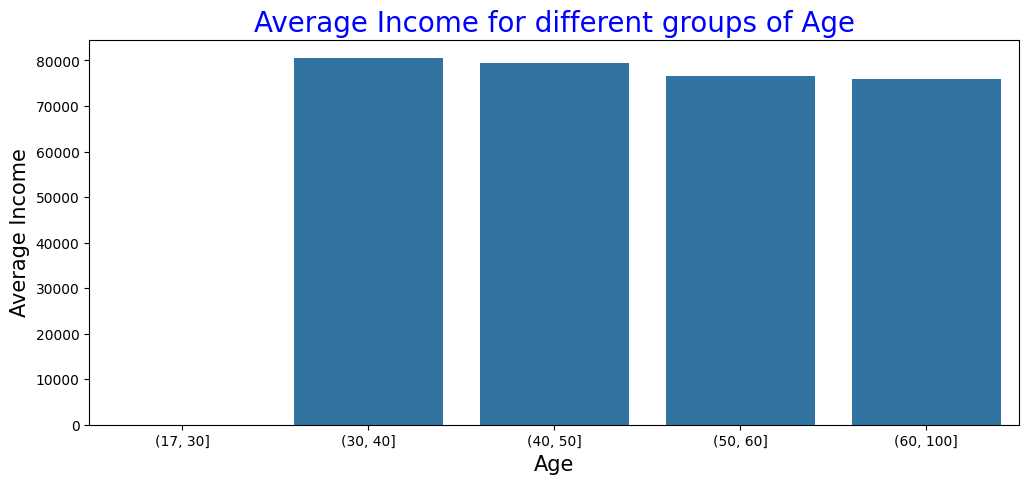

In [26]:
ageIncome = dfa.groupby(['Age'])['Income'].mean().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data = ageIncome[['Age', 'Income']], x = "Age", y = "Income")
plt.xlabel('Age', size = 15)
plt.ylabel('Average Income', size = 15)
plt.title('Average Incomе for different groups of Age', color = 'blue', size = 20)
plt.show()

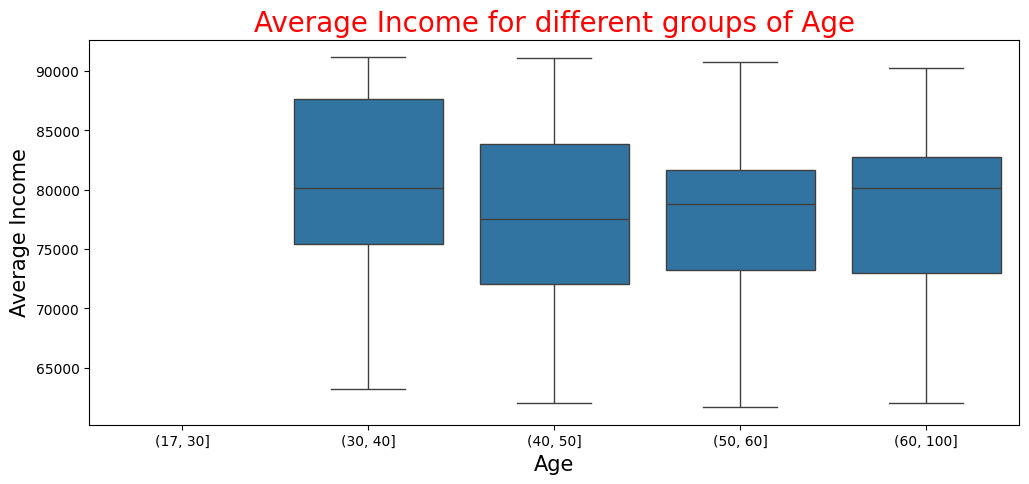

In [27]:
plt.figure(figsize=(12,5))
sns.boxplot(x = "Age", y = "Income", data=dfa[(dfa.Income>dfa.Income.quantile(0.1))&(dfa.Income<dfa.Income.quantile(0.9))])
plt.xlabel('Age', size = 15)
plt.ylabel('Average Income', size = 15)
plt.title('Average Incomе for different groups of Age', color = 'red', size = 20)
plt.show()

<Figure size 1200x500 with 0 Axes>

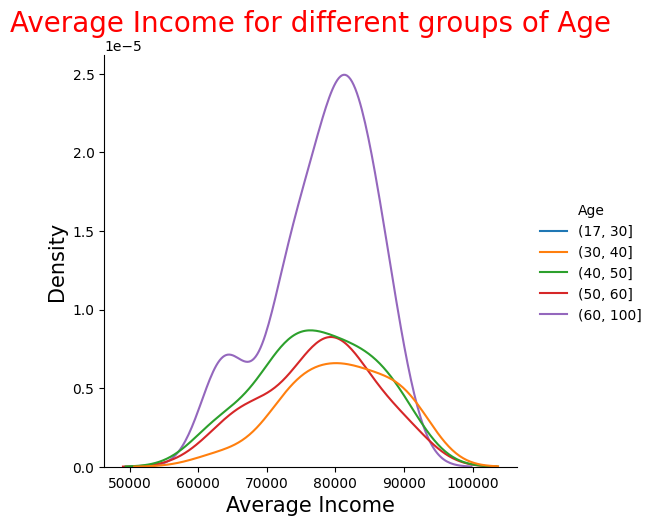

In [28]:
plt.figure(figsize=(12,5))
sns.displot(data=dfa[(dfa.Income>dfa.Income.quantile(0.1))&(dfa.Income<dfa.Income.quantile(0.9))].reset_index(),
            x = "Income", hue='Age', kind='kde')
plt.xlabel('Average Income', size = 15)
plt.ylabel('Density', size = 15)
plt.title('Average Incomе for different groups of Age', color = 'red', size = 20)
plt.show()

<Figure size 1200x500 with 0 Axes>

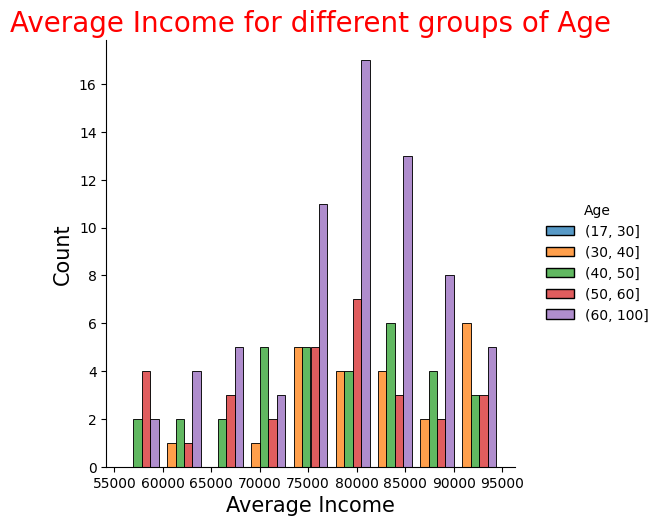

In [29]:
plt.figure(figsize=(12,5))
sns.displot(data=dfa[(dfa.Income>dfa.Income.quantile(0.05))&(dfa.Income<dfa.Income.quantile(0.95))].reset_index(), 
            x = "Income", hue='Age', multiple='dodge')
plt.xlabel('Average Income', size = 15)
plt.ylabel('Count', size = 15)
plt.title('Average Incomе for different groups of Age', color = 'red', size = 20)
plt.show()

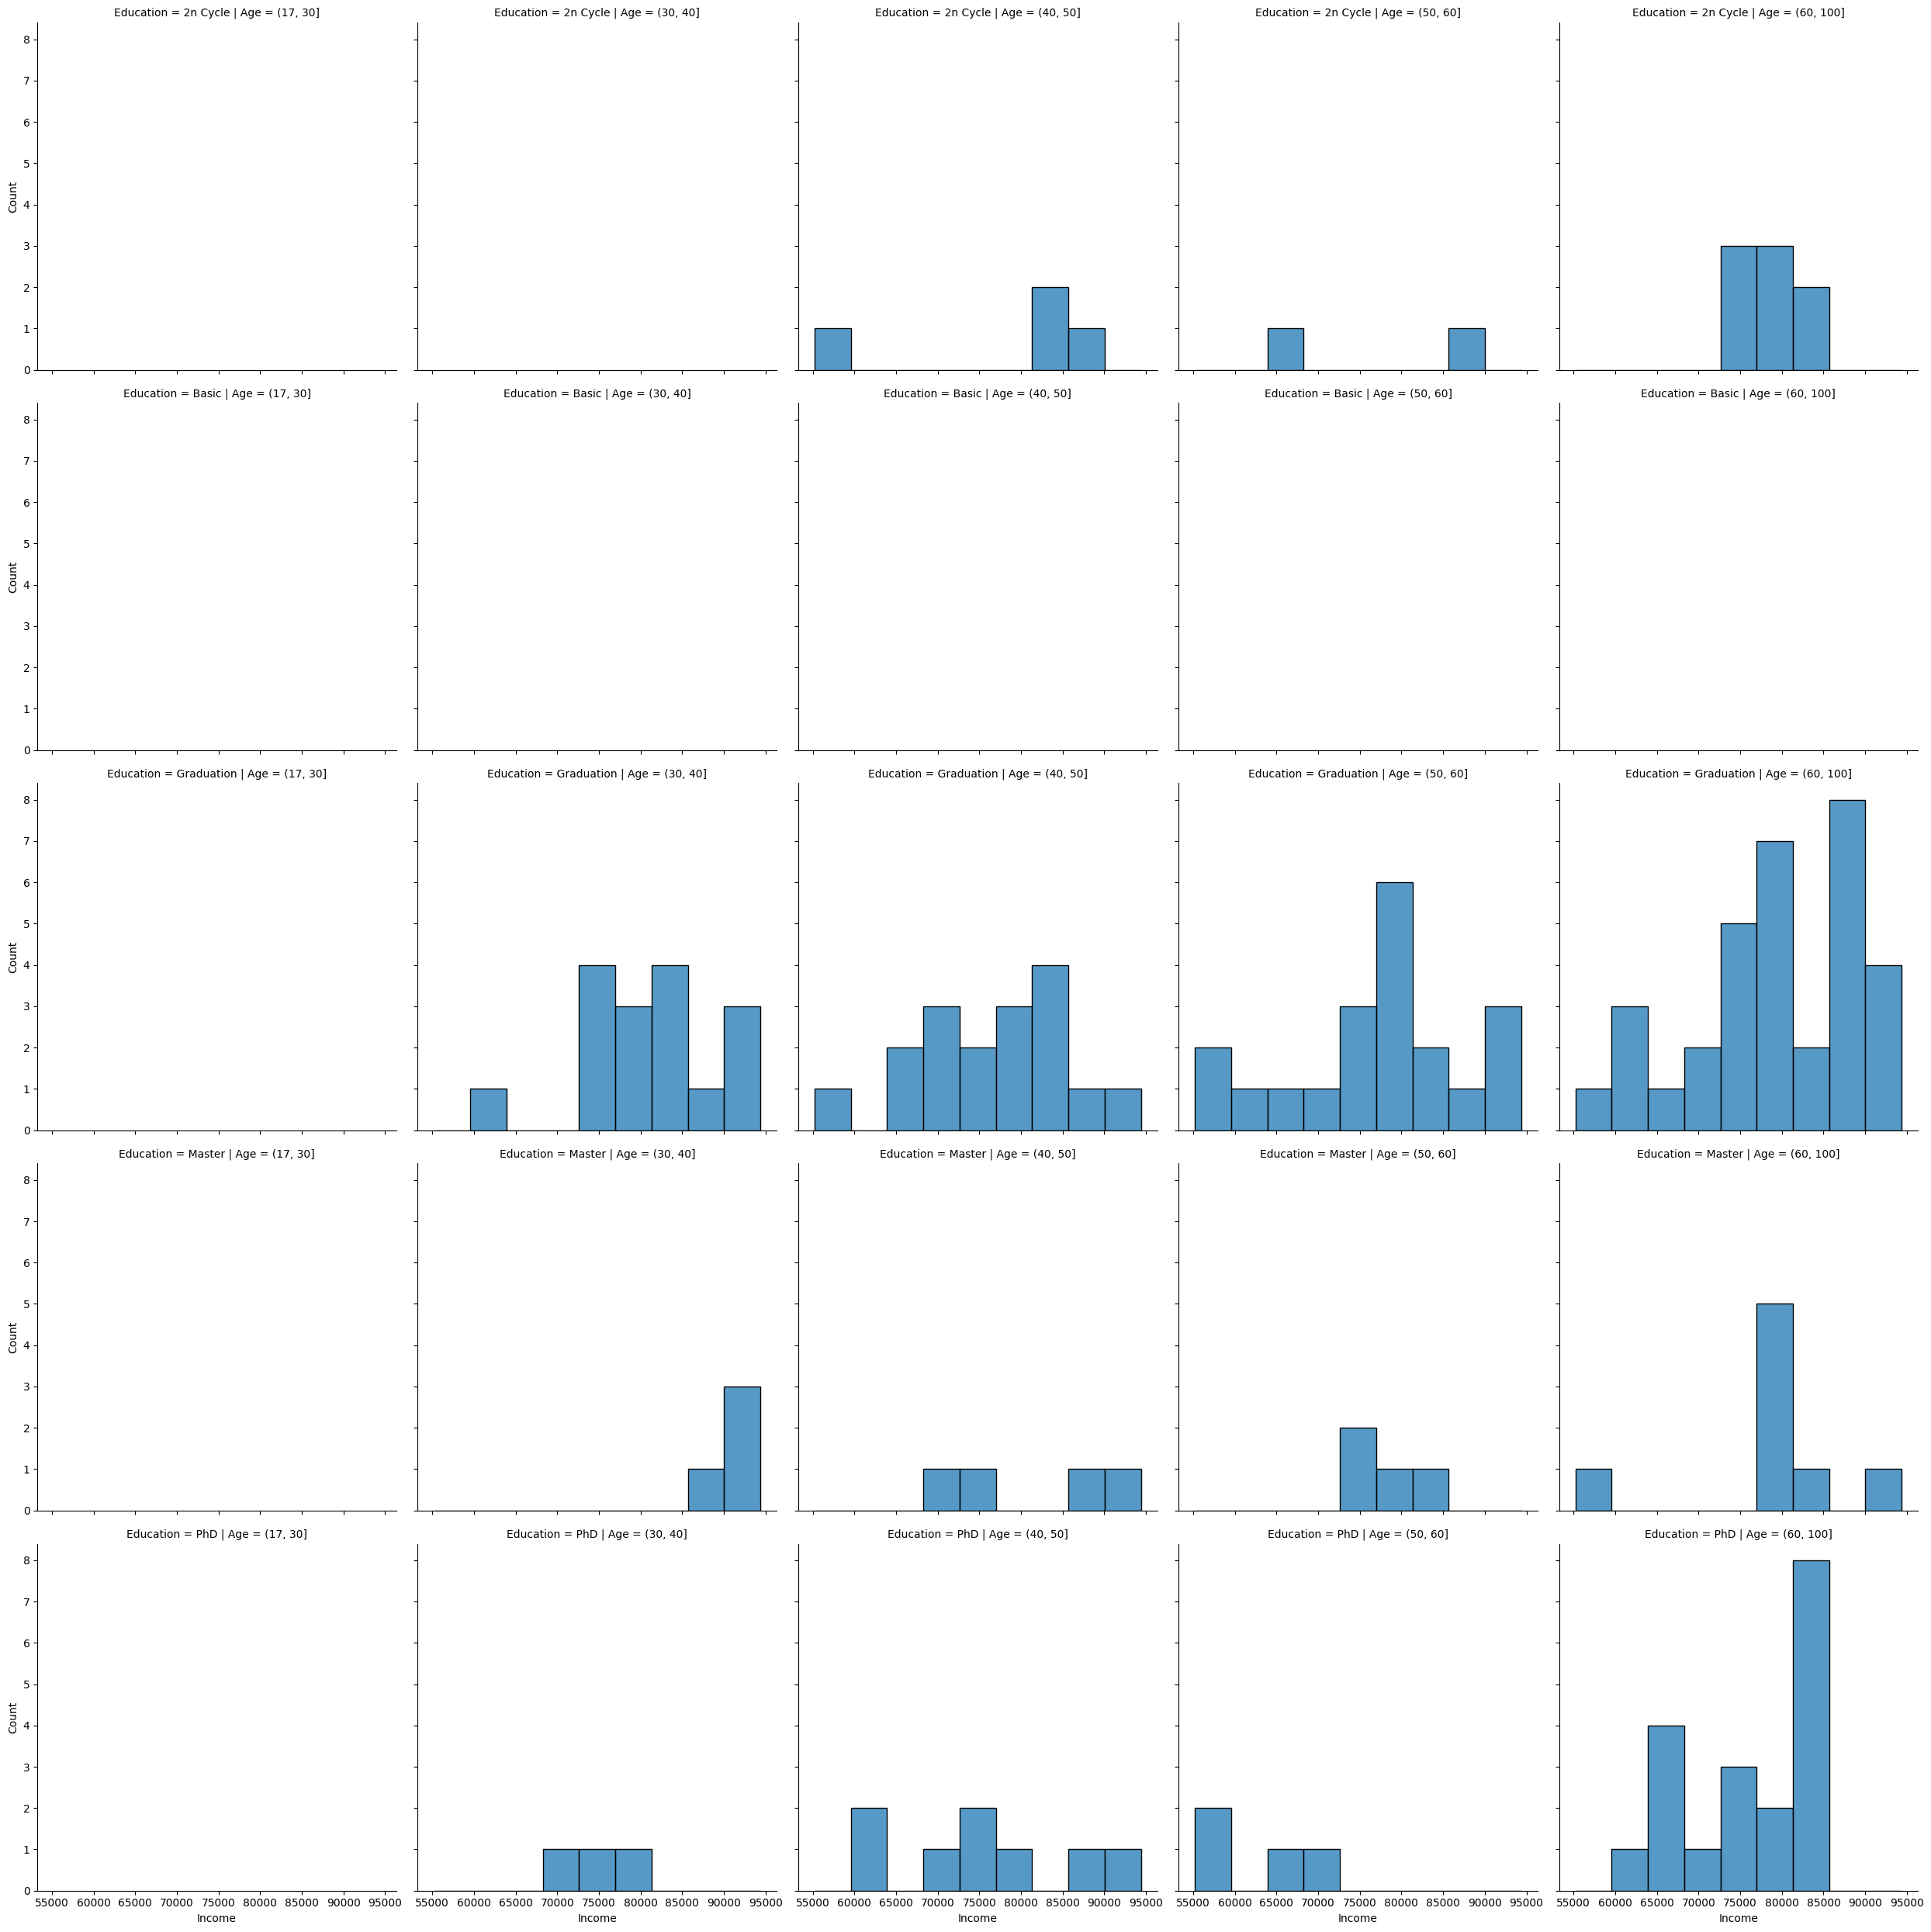

In [30]:
sns.displot(
    dfa[(dfa.Income>dfa.Income.quantile(0.05))&(dfa.Income<dfa.Income.quantile(0.95))].reset_index(), 
    x="Income", col="Age", row='Education'  
)

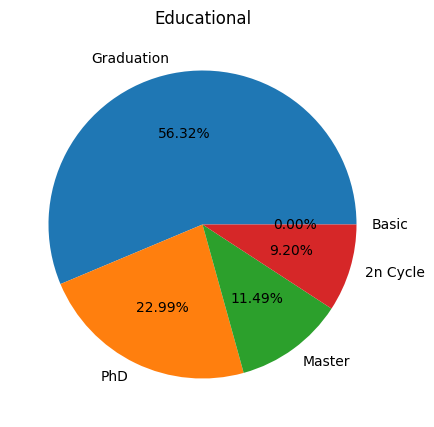

In [31]:
size = dfa['Education'].value_counts(normalize=True)
plt.figure(figsize=(10,5))
plt.pie(size, shadow = False, autopct = "%.2f%%", labels=size.index)
plt.title('Educational')
plt.show()

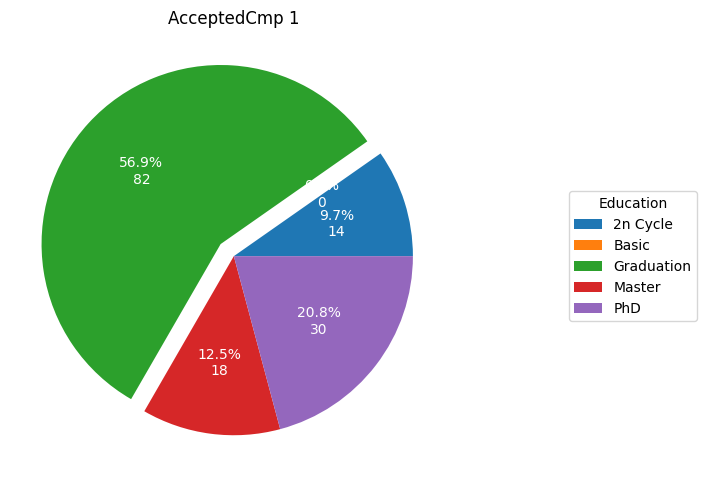

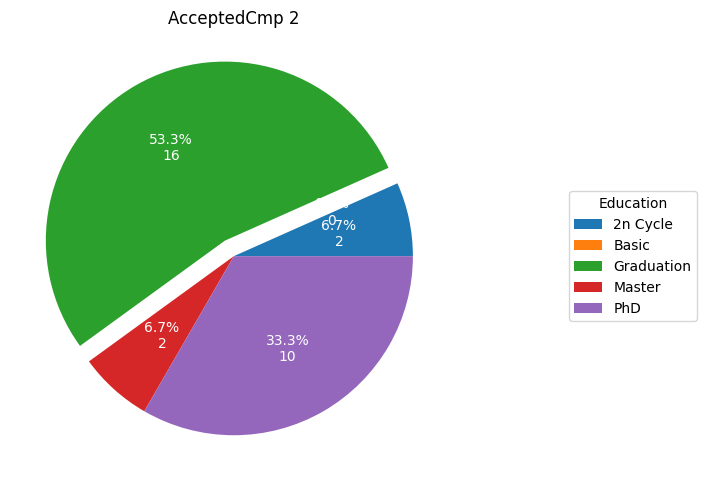

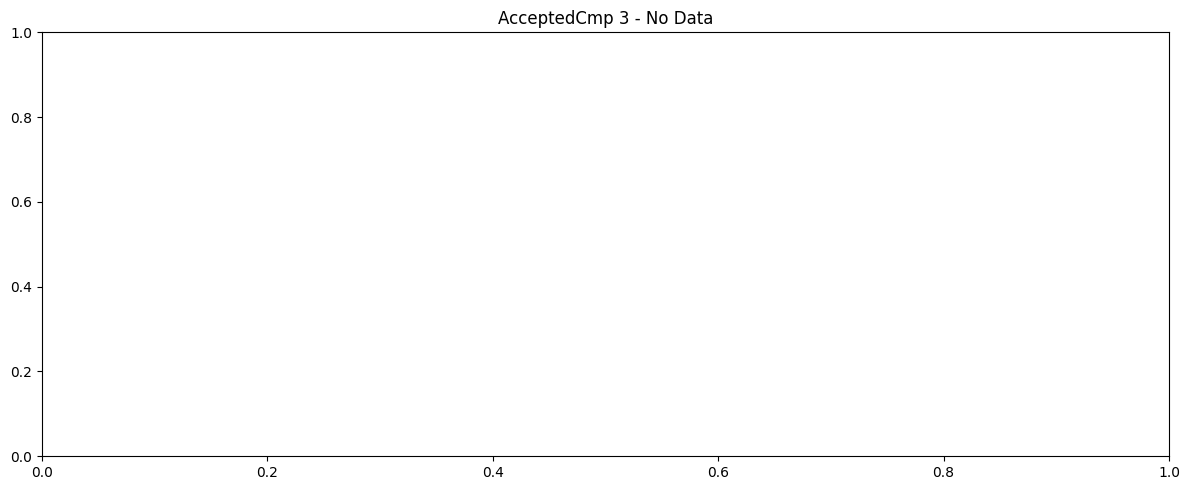

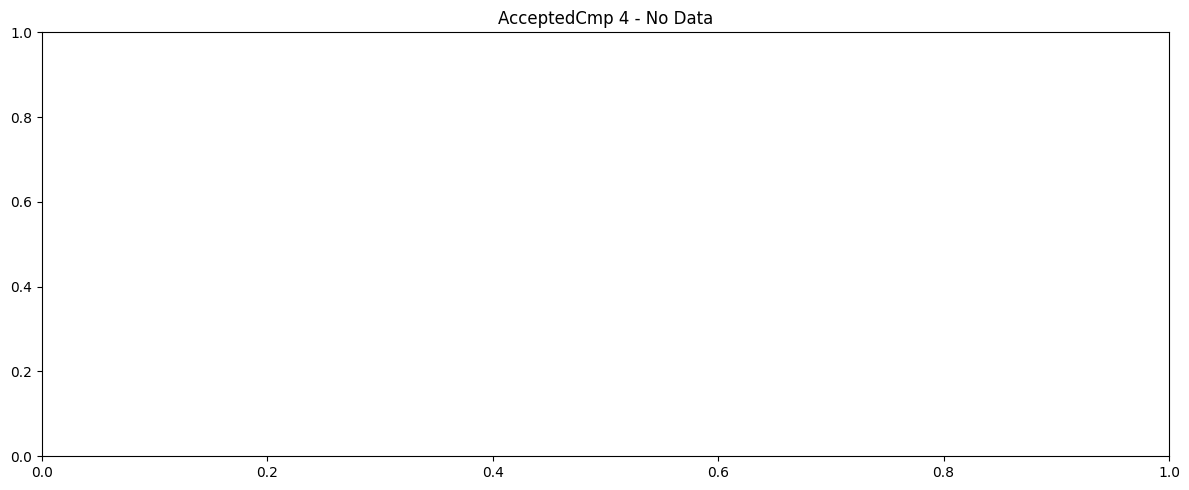

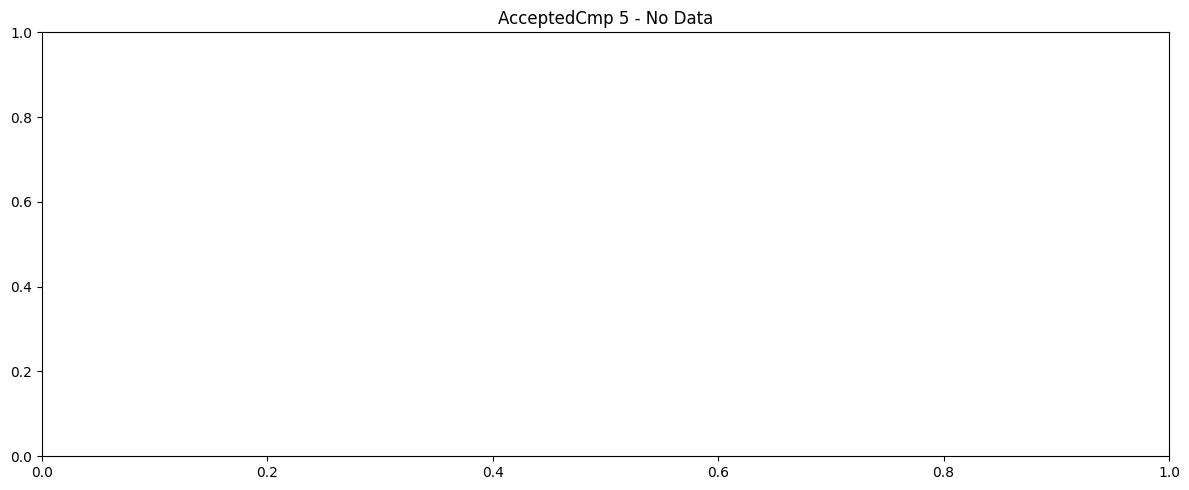

In [32]:
df_pie = df_p.reset_index()
df_pie.Total = df_pie.Total.fillna(0)
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n{:d}".format(pct, absolute)

for e in range(1, 6):
    plt.figure(figsize=(12, 5))
    dt = df_pie[df_pie['AcceptedCmp']==e]
    if not dt.empty:  # Check if there is data for the current AcceptedCmp
        exp = np.zeros(len(dt))
        if not dt['Total'].empty:
            exp[np.argmax(dt.Total)] = 0.1

        plt.pie(dt.Total, shadow=False, explode=exp,
                autopct=lambda pct: func(pct, dt.Total),
                textprops=dict(color="w"))

        plt.title('AcceptedCmp ' + str(e))
        plt.legend(dt.Education, title="Education",
                   loc="center right", bbox_to_anchor=(1.05, 0, 0.5, 1)) # Adjusted bbox_to_anchor
    else:
        plt.title(f'AcceptedCmp {e} - No Data') # Handle cases with no data
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
